In [1]:
import scipy.stats

In [4]:
BMG_upper_limit = ((6 * 12) + 1) * 2.54
BMG_lower_limit = ((5 * 12) + 10) * 2.54

In [3]:
BMG_upper_limit

185.42000000000002

In [6]:
BMG_lower_limit

177.8

In [7]:
mu = 178
sigma = 7.7

In [12]:
upper_height_percentile = scipy.stats.norm.cdf(BMG_upper_limit, loc=mu, scale=sigma)
print upper_height_percentile

0.832385865496


In [11]:
lower_height_percentile = scipy.stats.norm.cdf(BMG_lower_limit, loc=mu, scale=sigma)
print lower_height_percentile

0.489639027865


In [13]:
upper_height_percentile - lower_height_percentile

0.34274683763147457

-----------

In [58]:
import nsfg
import pandas as pd
import numpy as np
import thinkplot
import math
import thinkstats2

In [102]:
preg = nsfg.ReadFemPreg()
preg = preg.dropna(subset=['totalwgt_lb', 'agepreg'])

In [104]:
baby_weight = preg["totalwgt_lb"]
print baby_weight.head()

0    8.8125
1    7.8750
2    9.1250
3    7.0000
4    6.1875
Name: totalwgt_lb, dtype: float64


In [105]:
mom_age = preg["agepreg"]
print mom_age.head()

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64


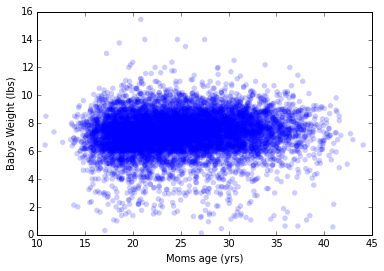

In [108]:
alpha = 0.2

thinkplot.Scatter(mom_age, baby_weight, alpha = alpha)
thinkplot.Show(xlabel='Moms age (yrs)',
                   ylabel='Babys Weight (lbs)',
                    xlim=[10, 45],
                     ylim=[0, 16],)

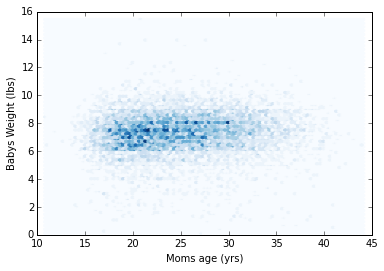

In [121]:
thinkplot.HexBin(mom_age, baby_weight)
thinkplot.Show(xlabel='Moms age (yrs)',
                   ylabel='Babys Weight (lbs)',
                    xlim=[10, 45],
                     ylim=[0, 16],)

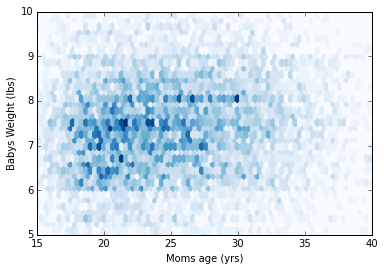

In [135]:
thinkplot.HexBin(mom_age, baby_weight, bins = 100)
thinkplot.Show(xlabel='Moms age (yrs)',
                   ylabel='Babys Weight (lbs)',
                    xlim=[15, 40],
                     ylim=[5, 10],
              )

In [109]:
#%matplotlib inline

In [172]:
%matplotlib

Using matplotlib backend: MacOSX


In [110]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

	# I changed np.mean to np.nanmean because the given series had nan's/
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [112]:
def PearsonCorr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr


In [113]:
print PearsonCorr(mom_age, baby_weight)

0.0688339703541


In [114]:
print np.nanmean(mom_age)
print np.nanmean(baby_weight)

24.9361285683
7.26562845762


In [83]:
print np.nanmean(mom_age)
print np.nanmean(baby_weight)

24.688151197
7.26562845762


In [100]:
print len(mom_age)
print len(baby_weight)

13593
13593


In [115]:

print len(mom_age)
print len(baby_weight)


9038
9038


In [118]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return thinkstats2.Corr(xranks, yranks)


In [119]:
print SpearmanCorr(mom_age, baby_weight)

0.0946100410966


--------------------------------------------------

In [ ]:
live = preg[preg.outcome == 1]
count = 0

for age in mom_age:
    print age, type(age)
    if age is 'nan':
        count +1
print count

In [ ]:
live = preg[preg.outcome == 1]

baby_weight_live = live["totalwgt_lb"]
mom_age_live = live["agepreg"]

thinkplot.Scatter(mom_age_live, baby_weight_live, alpha = alpha)
thinkplot.Show(xlabel='Moms age (yrs)',
                   ylabel='Babys Weight (lbs)',
                    xlim=[10, 45],
                     ylim=[0, 16],)

--------------------------------------------------


In [137]:
df = preg

In [136]:

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Save(root='chap07scatter3',
                   formats=['jpg'],
                   xlabel="mother's age (years)",
                   ylabel='birth weight (lbs)')


In [139]:
print BinnedPercentiles(df)

Writing chap07scatter3.jpg
None


## The Textbook Example...

In [ ]:
df = df.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)
    
for i, group in groups:
    print(i, len(group))
    
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(heights, weights, label=label)

## Our Example...
df --> preg
htm3 -> mom_age -> agepreg
wtkg2 -> baby_weight --> totalwgt_lb

(0, 58)
(1, 1852)
(2, 2962)
(3, 2336)
(4, 1393)
(5, 401)
(6, 36)


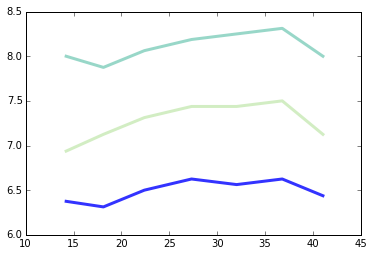

In [173]:
#preg = preg.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(15, 45, 5)
indices = np.digitize(preg.agepreg, bins)
groups = preg.groupby(indices)
    
for i, group in groups:
    print(i, len(group))
    
heights = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(heights, weights, label=label)

(1, 58)
(2, 1852)
(3, 2962)
(4, 2336)
(5, 1393)
(6, 401)
(7, 36)


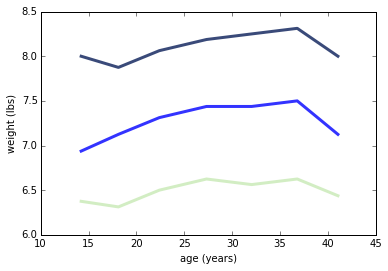

In [218]:
#preg = preg.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(10, 50, 5)
indices = np.digitize(preg.agepreg, bins)
groups = preg.groupby(indices)
    
for i, group in groups:
    print(i, len(group))
    
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     legend=True)

for percent in [25, 50, 75]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%s' % (percent)
        thinkplot.Plot(ages, weights, label=label)

In [144]:
bins = np.arange(10, 45, 7)
indices = np.digitize(baby_weight, bins)

groups = preg.groupby(indices)

In [145]:
for i, group in groups:
    print(i, len(group))

(0, 8863)
(1, 175)


In [ ]:
htm3

In [146]:
weights = [group.baby_weight.mean() for i, group in groups]

#cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

AttributeError: 'DataFrame' object has no attribute 'baby_weight'